<a href="https://colab.research.google.com/github/heysourin/Deep-Learning-Projects/blob/main/College-admission-prediction/College-admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [55]:
df.shape

(500, 9)

In [56]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [58]:
df.duplicated().sum()

0

In [59]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [60]:
# Removing serual number column
df.drop(columns=['Serial No.'], inplace=True)

In [61]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [62]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1 )

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [66]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [67]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear')) #activation function of the last node must be linear for regression problems

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(loss='mean_squared_error', optimizer='Adam',)

In [70]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.7963 - val_loss: 0.7760
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6519 - val_loss: 0.6368
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5343 - val_loss: 0.5240
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4424 - val_loss: 0.4334
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3673 - val_loss: 0.3616
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3101 - val_loss: 0.3043
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2619 - val_loss: 0.2510
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2139 - val_loss: 0.1974
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1661 - val_loss: 0.1471
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1216 - val_loss: 0.1033
Ep

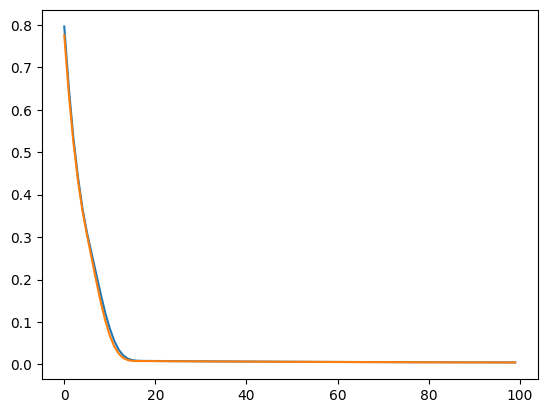

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [71]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
# We calculate r2_score for regression problems. accuracy_score is not for continious values

0.762152743945607